<a href="https://colab.research.google.com/github/sahin88/Keras_Learning_Meterial_and_Basic_Applications/blob/main/NeuralNetworkScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network  from Scratch

### Read Data Fram DataBase

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/home_price.csv')

X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

### Data Normalization

In [7]:
X_train.shape
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

### Define model as class

In [11]:

class myNeuralNetwork:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        self.result={'loss':[],'bias':[],'weight1':[],'weight2':[]}

    def sigmoid_numpy(self,X):
      return 1/(1+np.exp(-X))

    def normalize_tensor(self,vector):
      const=1e-15
      return np.array([vec-const if vec==1 else const-vec if vec==0 else vec for vec in vector])
  
    def binary_cross_entropy(self,y_out,y_pred):
      y_out=self.normalize_tensor(y_out)
      y_pred=self.normalize_tensor(y_pred)
      return -np.mean(y_out*np.log(y_pred)+(1-y_out)*np.log(1-y_pred))
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return self.sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = self.sigmoid_numpy(weighted_sum)
            loss = self.binary_cross_entropy(y_true, y_predicted)
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 
            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            self.result['loss'].append(loss)
            self.result['bias'].append(bias)
            self.result['weight1'].append(w1)
            self.result['weight2'].append(w2)
            if loss<=loss_thresold:
                break

        return w1, w2, bias

In [12]:
customModel = myNeuralNetwork()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Final weights and bias: w1: 5.051047623653049, w2: 1.4569794548473887, bias: -2.9596534546250037


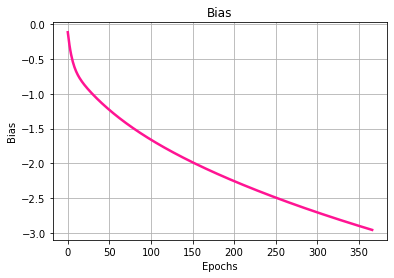

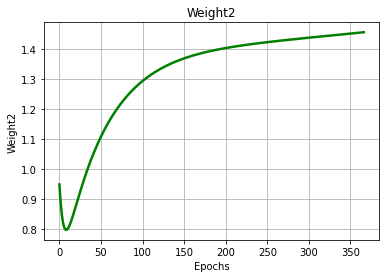

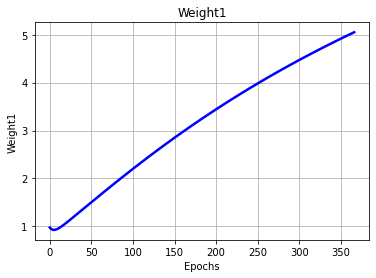

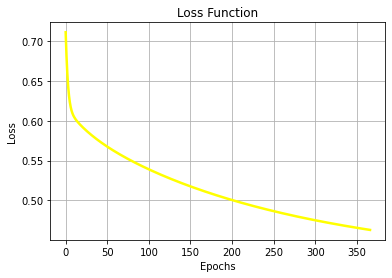

In [17]:
plt.plot(customModel.result['bias'], linewidth='2.5', color='deeppink'  )
plt.title('Bias')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Bias')
plt.show()

plt.plot(customModel.result['weight2'], linewidth='2.5', color='green'  )
plt.title('Weight2')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Weight2')
plt.show()

plt.plot(customModel.result['weight1'], linewidth='2.5', color='blue'  )
plt.title('Weight1')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Weight1')
plt.show()


plt.plot(customModel.result['loss'],linewidth='2.5',color='yellow')
plt.title('Loss Function')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
